## Install botorch first

```bash
pip install botorch
```


## Import modules, set plot styles, load data

In [1]:
%matplotlib agg

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# general theme
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

In [2]:
#Uploading 
X_COLS = ['Day1_H2O2', 'Day2_H2O2', 'Day3_H2O2', 'Day1_Lysozyme',
       'Day2_Lysozyme', 'Day3_Lysozyme', 'Day1_Sonication', 'Day2_Sonication',
       'Day3_Sonication']
X_COLS_H = ['Day 1 H2O2\n(µL)', 'Day 2 H2O2\n(µL)',
       'Day 3 H2O2\n(µL)', 'Day 1 Lysozyme\n(mg mL –1)',
       'Day 2 Lysozyme\n(mg mL –1)', 'Day 3 Lysozyme\n(mg mL –1)',
       'Day 1 Sonication\n(minutes)', 'Day 2 Sonication\n(minutes)',
       'Day 3 Sonication\n(minutes)']
Y_COLS = ['Average_Conc', 'StDev_Conc', 'Average_Fold', 'StDev_Fold']


df = pd.read_excel('Bio_ML_summary-07-19-24.xlsx', skiprows=4, usecols='B:AD', na_values=['na'])
df = df.rename(columns={h: c for h, c in zip(X_COLS_H, X_COLS)})
df = df[~df['Day3_Sonication'].isin(['Control', 'MRS'])].reset_index(drop=True)

for c in df.columns:
    df[c] = pd.to_numeric(df[c], errors='coerce')
df = df.fillna(0.0)

for c in df.columns:
    for xc in X_COLS:
        if str(c).startswith(xc.replace('_', ' ').replace('Day', 'Day ')):
            df.rename(columns={c: xc}, inplace=True)
            break

df.rename(columns={
    'Average Conc.\n(particlesmL –1)': 'Average_Conc',
    'St. Dev. Conc.\n(particlesmL –1)': 'StDev_Conc',
    'Particle\nFold Increase': 'Average_Fold',
    'St. Dev %': 'StDev_Fold',
}, inplace=True)
df['StDev_Fold'] = df['StDev_Fold'] / 100.0 * df['Average_Fold']
df = df[X_COLS + Y_COLS]
data_df = df.reset_index(drop=True)
data_df = data_df.groupby(X_COLS).mean().reset_index()
data_df['ROUND_NUM'] = [n // 5 + 1 for n in range(len(data_df))]
data_df

,Day1_H2O2,Day2_H2O2,Day3_H2O2,Day1_Lysozyme,Day2_Lysozyme,Day3_Lysozyme,Day1_Sonication,Day2_Sonication,Day3_Sonication,Average_Conc,StDev_Conc,Average_Fold,StDev_Fold,ROUND_NUM
0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,1
1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,30.0,2.183333e+09,4.988877e+08,1.378947,0.315087,1
2,0.0,0.0,0.0,0.0,0.00,0.0,0.0,20.0,0.0,1.750000e+09,1.000000e+08,1.105263,0.063158,1
3,0.0,0.0,0.0,0.0,0.00,0.0,0.0,30.0,0.0,1.300000e+09,1.500000e+08,0.821053,0.094737,1
4,0.0,0.0,0.0,0.0,0.00,0.0,0.0,60.0,0.0,3.292500e+09,7.221291e+08,2.412897,0.504349,1
5,0.0,0.0,0.0,0.0,0.00,0.0,30.0,0.0,0.0,1.900000e+09,5.000000e+07,1.200000,0.031579,2
6,0.0,0.0,0.0,0.0,0.00,1.5,0.0,0.0,0.0,2.273333e+10,2.054805e+09,20.058824,1.813063,2
7,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.0,0.0,2.006667e+10,1.247219e+09,17.705882,1.100487,2
8,0.0,0.0,0.0,0.0,1.50,0.0,0.0,0.0,0.0,2.106667e+10,9.428090e+08,18.588235,0.831890,2
9,0.0,0.0,0.0,0.0,1.50,0.0,0.0,0.0,60.0,1.233500e+10,2.197015e+09,12.212871,2.175262,2


## Train GP models

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Y_COL = 'Average_Conc'
Y_STD_COL = 'StDev_Conc'

x_scaler = MinMaxScaler().fit(data_df[X_COLS])
y_scaler = StandardScaler().fit(data_df[[Y_COL]])

data_df[[f'Scaled_{Y_COL}']] = y_scaler.transform(data_df[[Y_COL]])
data_df[[f'Scaled_{Y_STD_COL}']] = data_df[[Y_STD_COL]] / y_scaler.scale_

Y_COL2 = 'Average_Fold'
Y_STD_COL2 = 'StDev_Fold'

y_scaler2 = StandardScaler().fit(data_df[[Y_COL2]])

data_df[[f'Scaled_{Y_COL2}']] = y_scaler2.transform(data_df[[Y_COL2]])
data_df[[f'Scaled_{Y_STD_COL2}']] = data_df[[Y_STD_COL2]] / y_scaler2.scale_
data_df = data_df.astype(np.float64)

data_df

,Day1_H2O2,Day2_H2O2,Day3_H2O2,Day1_Lysozyme,Day2_Lysozyme,Day3_Lysozyme,Day1_Sonication,Day2_Sonication,Day3_Sonication,Average_Conc,StDev_Conc,Average_Fold,StDev_Fold,ROUND_NUM,Scaled_Average_Conc,Scaled_StDev_Conc,Scaled_Average_Fold,Scaled_StDev_Fold
0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,1.0,-1.233508,0.000000,-1.272323,0.000000
1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,30.0,2.183333e+09,4.988877e+08,1.378947,0.315087,1.0,-1.044325,0.043228,-1.124493,0.033779
2,0.0,0.0,0.0,0.0,0.00,0.0,0.0,20.0,0.0,1.750000e+09,1.000000e+08,1.105263,0.063158,1.0,-1.081872,0.008665,-1.153833,0.006771
3,0.0,0.0,0.0,0.0,0.00,0.0,0.0,30.0,0.0,1.300000e+09,1.500000e+08,0.821053,0.094737,1.0,-1.120864,0.012997,-1.184302,0.010156
4,0.0,0.0,0.0,0.0,0.00,0.0,0.0,60.0,0.0,3.292500e+09,7.221291e+08,2.412897,0.504349,1.0,-0.948217,0.062571,-1.013648,0.054069
5,0.0,0.0,0.0,0.0,0.00,0.0,30.0,0.0,0.0,1.900000e+09,5.000000e+07,1.200000,0.031579,2.0,-1.068875,0.004332,-1.143677,0.003385
6,0.0,0.0,0.0,0.0,0.00,1.5,0.0,0.0,0.0,2.273333e+10,2.054805e+09,20.058824,1.813063,2.0,0.736304,0.178046,0.878091,0.194370
7,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.0,0.0,2.006667e+10,1.247219e+09,17.705882,1.100487,2.0,0.505242,0.108070,0.625843,0.117978
8,0.0,0.0,0.0,0.0,1.50,0.0,0.0,0.0,0.0,2.106667e+10,9.428090e+08,18.588235,0.831890,2.0,0.591890,0.081693,0.720436,0.089183
9,0.0,0.0,0.0,0.0,1.50,0.0,0.0,0.0,60.0,1.233500e+10,2.197015e+09,12.212871,2.175262,2.0,-0.164697,0.190368,0.036963,0.233200


In [4]:
def set_seed(seed):
    torch.manual_seed(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.use_deterministic_algorithms(True)

import random
import torch
import pandas as pd
import numpy as np


def to_torch(x):
    if isinstance(x, list):
        return torch.tensor(x)
    elif isinstance(x, np.ndarray):
        return torch.from_numpy(x)
    elif isinstance(x, (pd.DataFrame, pd.Series)):
        return torch.from_numpy(x.values)
    else:
        return torch.tensor(x)
        # raise ValueError("The input type is not supported. Please provide a list, numpy array, pandas dataframe, or pandas series.")

from botorch.acquisition.monte_carlo import qExpectedImprovement
from botorch.acquisition.objective import ConstrainedMCObjective
from botorch.models import SingleTaskGP
from botorch import fit_gpytorch_mll
from gpytorch.mlls import ExactMarginalLogLikelihood

train_x = to_torch(x_scaler.transform(data_df[X_COLS]))
train_Y = to_torch(data_df[[f'Scaled_{Y_COL}']])
train_Yvar = to_torch(data_df[[f'Scaled_{Y_STD_COL}']]) ** 2

set_seed(0)
model = SingleTaskGP(
        train_X=train_x,
        train_Y=train_Y,
        train_Yvar=train_Yvar,
    )
mll = ExactMarginalLogLikelihood(model.likelihood, model)
fit_gpytorch_mll(mll, max_retries=50, )

train_Y2 = to_torch(data_df[[f'Scaled_{Y_COL2}']])
train_Y2var = to_torch(data_df[[f'Scaled_{Y_STD_COL2}']]) ** 2

set_seed(0)
model2 = SingleTaskGP(
        train_X=train_x,
        train_Y=train_Y2,
        train_Yvar=train_Y2var,
    )
mll2 = ExactMarginalLogLikelihood(model2.likelihood, model2)
fit_gpytorch_mll(mll2, max_retries=50, )


try:
    from sklearn.utils._testing import ignore_warnings
except ImportError:
    from sklearn.utils.testing import ignore_warnings
from linear_operator.utils.warnings import NumericalWarning

np.int = int
np.float = float
np.bool = bool

@ignore_warnings(category=UserWarning)
@ignore_warnings(category=NumericalWarning)
def predict(x):
    transformed_x = to_torch(x_scaler.transform(np.array(x)))
    return model(transformed_x).mean.detach().cpu().numpy()


@ignore_warnings(category=UserWarning)
@ignore_warnings(category=NumericalWarning)
def predict2(x):
    transformed_x = to_torch(x_scaler.transform(np.array(x)))
    return model2(transformed_x).mean.detach().cpu().numpy()



C:\Users\sneh4\anaconda3\envs\ml_ot2\lib\site-packages\gpytorch\likelihoods\noise_models.py:150: NumericalWarning: Very small noise values detected. This will likely lead to numerical instabilities. Rounding small noise values up to 1e-06.
  warnings.warn(
C:\Users\sneh4\anaconda3\envs\ml_ot2\lib\site-packages\gpytorch\likelihoods\noise_models.py:150: NumericalWarning: Very small noise values detected. This will likely lead to numerical instabilities. Rounding small noise values up to 1e-06.
  warnings.warn(


## Plot SHAP

In [5]:
import shap
dedup_df = data_df.groupby(X_COLS).mean().reset_index()

# use "predict" for "Average_Conc", and "predict2" for Average_Fold
explainer = shap.KernelExplainer(predict, dedup_df[X_COLS])
explainer.nsamples = 8192
shap_values = explainer.shap_values(dedup_df[X_COLS], nsamples=8192)

explainer2 = shap.KernelExplainer(predict2, dedup_df[X_COLS])
explainer2.nsamples = 8192
shap_values2 = explainer2.shap_values(dedup_df[X_COLS], nsamples=8192)

shap_values_lut = {
    Y_COL: shap_values,
    Y_COL2: shap_values2
}
shap_values_lut.keys()

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

dict_keys(['Average_Conc', 'Average_Fold'])

## Merge SHAP

In [6]:
import itertools

# group X_COLS based on their suffixes
x_col_groups = {k: list(g) for k, g in itertools.groupby(X_COLS, lambda c: c.split('_')[1])}
x_col_groups

{'H2O2': ['Day1_H2O2', 'Day2_H2O2', 'Day3_H2O2'],
 'Lysozyme': ['Day1_Lysozyme', 'Day2_Lysozyme', 'Day3_Lysozyme'],
 'Sonication': ['Day1_Sonication', 'Day2_Sonication', 'Day3_Sonication']}

Average_Conc


is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


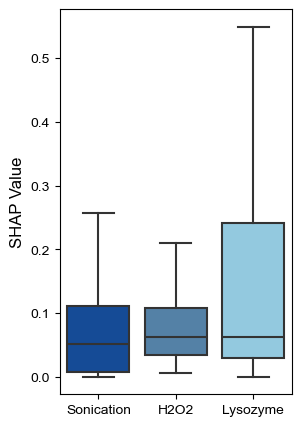

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categ

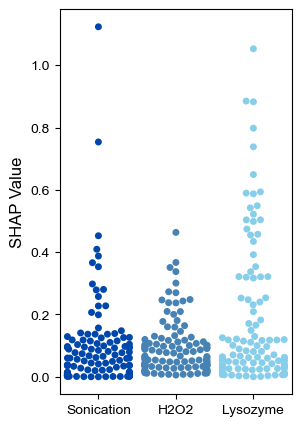

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


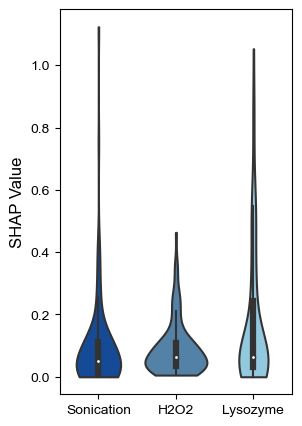

Average_Fold


is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


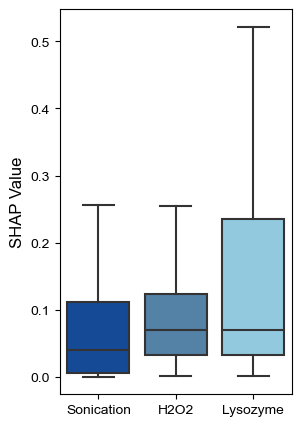

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categ

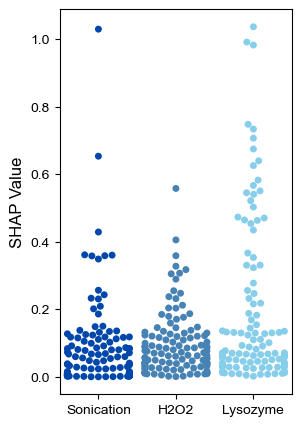

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


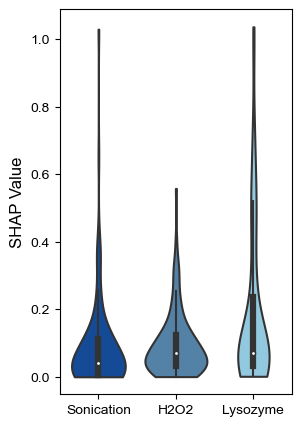

41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
29.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


In [7]:
import seaborn as sns

custom_colors = ['#0047AB', '#4682B4', '#87CEEB']

for y_col, shap_values in shap_values_lut.items():
    plt.close('all')
    print(y_col)
    
    shap_df = pd.DataFrame(shap_values, columns=X_COLS)
    grouped_shap_df = pd.DataFrame(
        {group: shap_df[x_col_groups[group]].values.reshape(-1) for group in ['Sonication', 'H2O2', 'Lysozyme']}
    ).abs() # Take abusolute values

    for fig_type, fig_func, fig_kwargs in [
        ('box_plot', sns.boxplot, dict(showfliers=False)),
        ('swarm_plot', sns.swarmplot, dict()),
        ('violin_plot', sns.violinplot, dict(cut=0, )),
        
    ]:
        fig, ax = plt.subplots(1, 1, figsize=(3, 5))
        fig_func(data=grouped_shap_df, ax=ax, palette=custom_colors, **fig_kwargs)
        ax.set_ylabel('SHAP Value')
        fig.savefig(f'SHAP.{y_col}.aggregated.{fig_type}.png', dpi=600, bbox_inches='tight')
        display(fig)
        

In [8]:
import sys
print(sys.executable)


C:\Users\sneh4\anaconda3\envs\ml_ot2\python.exe
